# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
for city in cities:
    
    try:
        url = "http://api.openweathermap.org/data/2.5/weather?q=" + city + "&appid=" + weather_api_key
        #url = "http://api.openweathermap.org/data/2.5/weather?q=bethel&appid=105d43fce94039a273494779f16bdf1d"
        response = requests.get(url)
        print("Processing Record for: "  + city + ": Response 200")
    except:
        print(city + " not found. Skipping...")

Processing Record for: mangrol: Response 200
Processing Record for: punta arenas: Response 200
Processing Record for: mar del plata: Response 200
Processing Record for: east london: Response 200
Processing Record for: airai: Response 200
Processing Record for: lavrentiya: Response 200
Processing Record for: omaha: Response 200
Processing Record for: ponta do sol: Response 200
Processing Record for: avarua: Response 200
Processing Record for: ushuaia: Response 200
Processing Record for: broome: Response 200
Processing Record for: luderitz: Response 200
Processing Record for: hithadhoo: Response 200
Processing Record for: bluff: Response 200
Processing Record for: marfino: Response 200
Processing Record for: busselton: Response 200
Processing Record for: taltal: Response 200
Processing Record for: carnarvon: Response 200
Processing Record for: wilmington: Response 200
Processing Record for: kasongo-lunda: Response 200
Processing Record for: karla: Response 200
Processing Record for: bamb

Processing Record for: ushtobe: Response 200
Processing Record for: plover: Response 200
Processing Record for: russell: Response 200
Processing Record for: tuktoyaktuk: Response 200
Processing Record for: saskylakh: Response 200
Processing Record for: kilis: Response 200
Processing Record for: isangel: Response 200
Processing Record for: kavieng: Response 200
Processing Record for: luganville: Response 200
Processing Record for: toktogul: Response 200
Processing Record for: kushmurun: Response 200
Processing Record for: fortuna: Response 200
Processing Record for: khanpur: Response 200
Processing Record for: karratha: Response 200
Processing Record for: sao filipe: Response 200
Processing Record for: kahta: Response 200
Processing Record for: arraial do cabo: Response 200
Processing Record for: leh: Response 200
Processing Record for: karaton: Response 200
Processing Record for: geraldton: Response 200
Processing Record for: bredasdorp: Response 200
Processing Record for: ostrovnoy: R

Processing Record for: sucua: Response 200
Processing Record for: ryotsu: Response 200
Processing Record for: barbate: Response 200
Processing Record for: anadyr: Response 200
Processing Record for: tamale: Response 200
Processing Record for: dubki: Response 200
Processing Record for: westport: Response 200
Processing Record for: ulyanovsk: Response 200
Processing Record for: alotau: Response 200
Processing Record for: lompoc: Response 200
Processing Record for: muli: Response 200
Processing Record for: altay: Response 200
Processing Record for: oussouye: Response 200
Processing Record for: grand river south east: Response 200
Processing Record for: velikie luki: Response 200
Processing Record for: ferme-neuve: Response 200
Processing Record for: kawalu: Response 200
Processing Record for: uwayl: Response 200
Processing Record for: pio xii: Response 200
Processing Record for: havre-saint-pierre: Response 200
Processing Record for: denpasar: Response 200
Processing Record for: louis tri

Processing Record for: sedelnikovo: Response 200
Processing Record for: rawson: Response 200
Processing Record for: kudahuvadhoo: Response 200
Processing Record for: masuda: Response 200
Processing Record for: kawambwa: Response 200
Processing Record for: vyshkov: Response 200
Processing Record for: temaraia: Response 200
Processing Record for: acajete: Response 200
Processing Record for: vila do maio: Response 200
Processing Record for: biltine: Response 200
Processing Record for: elliot lake: Response 200
Processing Record for: wageningen: Response 200
Processing Record for: pueblo: Response 200
Processing Record for: mocuba: Response 200
Processing Record for: novobirilyussy: Response 200
Processing Record for: naini tal: Response 200
Processing Record for: glendive: Response 200
Processing Record for: katete: Response 200
Processing Record for: pulaski: Response 200
Processing Record for: damghan: Response 200
Processing Record for: wanning: Response 200
Processing Record for: kapi

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [312]:
#csv file stored in dataframe df_country
df_country = pd.read_csv('../output_data/cities.csv')


In [313]:
df_country

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05
...,...,...,...,...,...,...,...,...,...,...
543,543,yabrud,0,SY,1558378840,32,33.97,36.66,80.60,8.05
544,544,paraiso,5,MX,1558378898,4,24.01,-104.61,84.20,16.11
545,545,veraval,0,FR,1558378898,62,49.65,0.71,61.00,8.05
546,546,novyy urgal,100,RU,1558378899,93,51.07,132.56,49.74,2.68


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

#defining axises for scatter City Latitude vs. Max Temperature and plotting it with labels and title
scatter_maxTemp = df_country['Max Temp']
scatter_lat = df_country['Lat']
plt.figure(figsize=(10,7))
plt.scatter(scatter_lat,scatter_maxTemp)
plt.grid()
plt.xlabel('Latitude', fontsize=16)
plt.ylabel('Max Temperature (F)', fontsize=16)
plt.title("City Latitude vs. Max Temperature (05/28/19)", fontsize=16)

Text(0.5, 1.0, 'City Latitude vs. Max Temperature (05/28/19)')

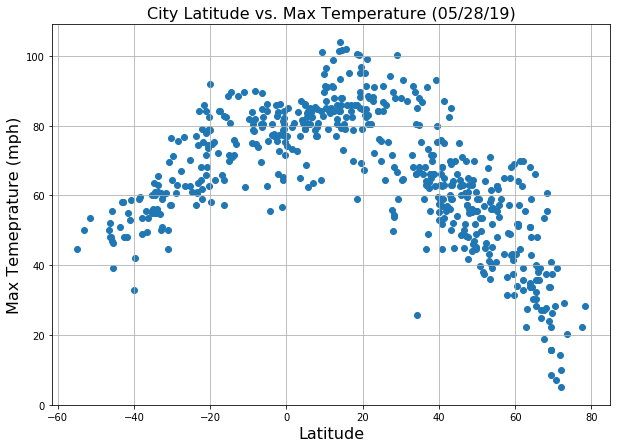

In [314]:
#defining axises for scatter City Latitude vs. Cloudiness and plotting it with labels and title
scatter_MaxTemp = df_country['Max Temp']
scatter_lat = df_country['Lat']
plt.figure(figsize=(10,7))
plt.scatter(scatter_lat,scatter_MaxTemp)
plt.grid()
plt.xlabel('Latitude', fontsize=16)
plt.ylabel('Max Temeprature (mph)', fontsize=16)
plt.title("City Latitude vs. Max Temperature (05/28/19)", fontsize=16)

#### Latitude vs. Humidity Plot

Text(0.5, 1.0, 'City Latitude vs. Humidity (05/28/19)')

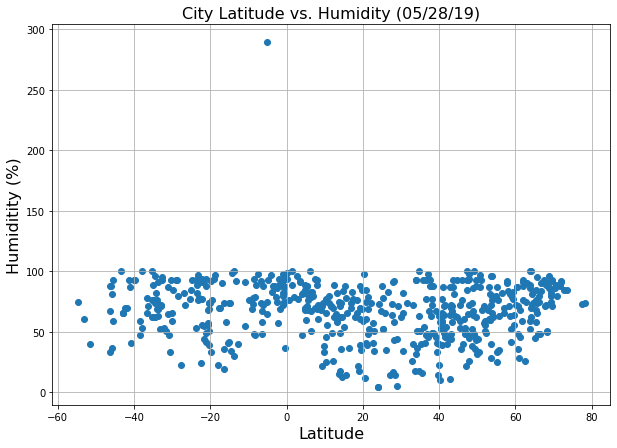

In [315]:
#defining axises for scatter City Latitude vs. Humidity and plotting it with labels and title
scatter_Humidity = df_country['Humidity']
plt.figure(figsize=(10,7))
plt.scatter(scatter_lat,scatter_Humidity)
plt.grid()
plt.xlabel('Latitude', fontsize=16)
plt.ylabel('Humiditity (%)', fontsize=16)
plt.title("City Latitude vs. Humidity (05/28/19)", fontsize=16)

#### Latitude vs. Cloudiness Plot

Text(0.5, 1.0, 'City Latitude vs. Cloudiness (08/22/18)')

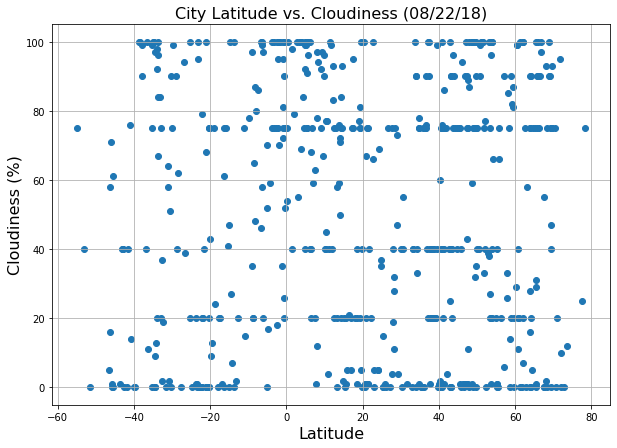

In [316]:
#defining axises for scatter City Latitude vs. Cloudiness and plotting it with labels and title
scatter_Cloudiness = df_country['Cloudiness']
plt.figure(figsize=(10,7))
plt.scatter(scatter_lat,scatter_Cloudiness)
plt.grid()
plt.xlabel('Latitude', fontsize=16)
plt.ylabel('Cloudiness (%)', fontsize=16)
plt.title("City Latitude vs. Cloudiness (08/22/18)", fontsize=16)

#### Latitude vs. Wind Speed Plot

Text(0.5, 1.0, 'City Latitude vs. Wind Speed (05/28/19)')

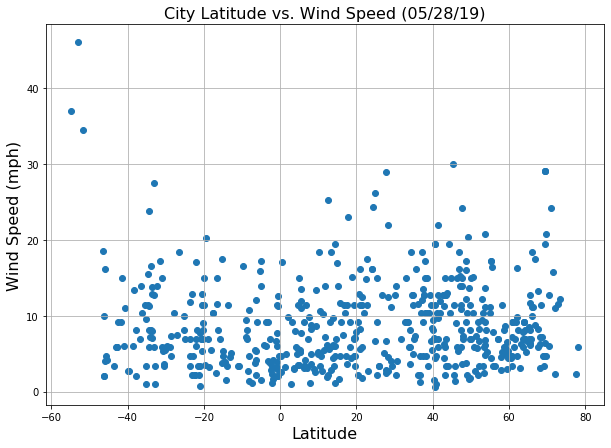

In [317]:
#defining axises for scatter City Latitude vs. Cloudiness and plotting it with labels and title
scatter_WindSpeed = df_country['Wind Speed']
plt.figure(figsize=(10,7))
plt.scatter(scatter_lat,scatter_WindSpeed)
plt.grid()
plt.xlabel('Latitude', fontsize=16)
plt.ylabel('Wind Speed (mph)', fontsize=16)
plt.title("City Latitude vs. Wind Speed (05/28/19)", fontsize=16)

## Linear Regression

In [343]:
# OPTIONAL: Create a function to create Linear Regression plots

#create function
def LinearRegression(x_axis, y_axis, x_label, y_label, plot_title, x_coor, y_coor):
    
    #calculate r^2
    r_squared = stats.linregress(x_axis,y_axis)[2]

    print(f"The r-squared is: {r_squared}".format(r_squared))
    
    #plot the plot
    plt.figure(figsize=(10,7))
    plt.scatter(x_axis,y_axis)
    plt.xlabel(x_label, fontsize=16)
    plt.ylabel(y_label, fontsize=16)
    plt.title(plot_title, fontsize=16)
    
    #get slope and intercept
    slope, intercept = np.polyfit(x_axis,y_axis, 1)
    
    #rounding slope and  intercept 
    intercept = intercept.round(2)
    slope = slope.round(2)
    
    #plot the regression line
    line = slope*np.array(x_axis)+intercept
    plt.plot(x_axis, (slope*x_axis) + intercept , color = 'r', linewidth = 3.5)

    #display regression formula 
    #if statement to determine which hemisphere to place formula in correct place
    
    #x_coor and y_coor are used to determine equation location
    plt.annotate( "y = " + str(slope) + "x + " + str(intercept),xycoords='figure fraction', xy =(x_coor, y_coor),fontsize= 30,color="red")
    
   


In [319]:
# Create Northern and Southern Hemisphere DataFrames

#Storing dataframe columsn in a list for the loc
list_df_country = list(df_country.columns)

#creating southern and northern DFs using loc
df_northern_country = df_country.loc[df_country['Lat'] > 0, list_df_country]
df_southern_country = df_country.loc[df_country['Lat'] < 0, list_df_country]

df_southern_country['Lat'][1]

-20.41

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8151657406810829


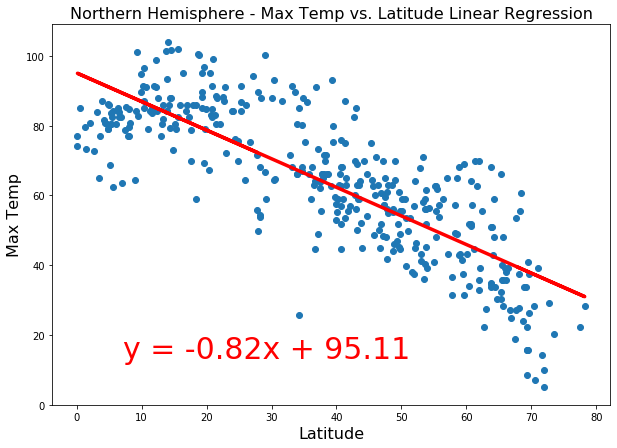

In [344]:
#defining axises for scatter City Latitude vs. Cloudiness and plotting it with labels and title

LinearRegression(df_northern_country['Lat'],df_northern_country['Max Temp'],"Latitude","Max Temp","Northern Hemisphere - Max Temp vs. Latitude Linear Regression",0.2,0.2)


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7602633550516462


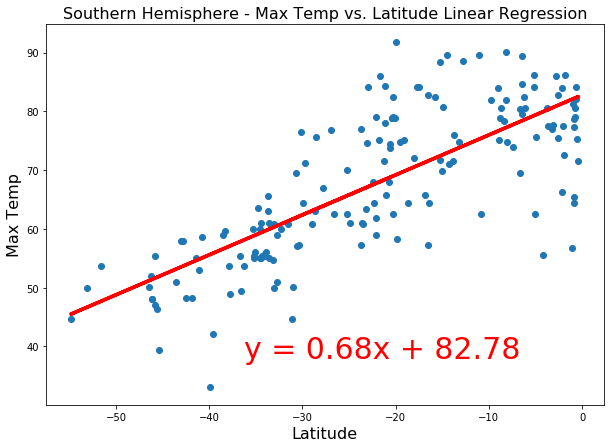

In [347]:

LinearRegression(df_southern_country['Lat'],df_southern_country['Max Temp'],"Latitude","Max Temp","Southern Hemisphere - Max Temp vs. Latitude Linear Regression",0.4, 0.2)



####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10358336015746496


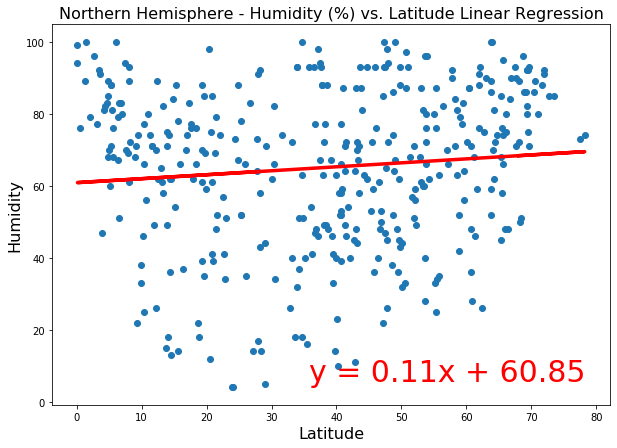

In [353]:
LinearRegression(df_northern_country['Lat'],df_northern_country['Humidity'],"Latitude","Humidity","Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression",0.5, 0.15)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.14689473425583074


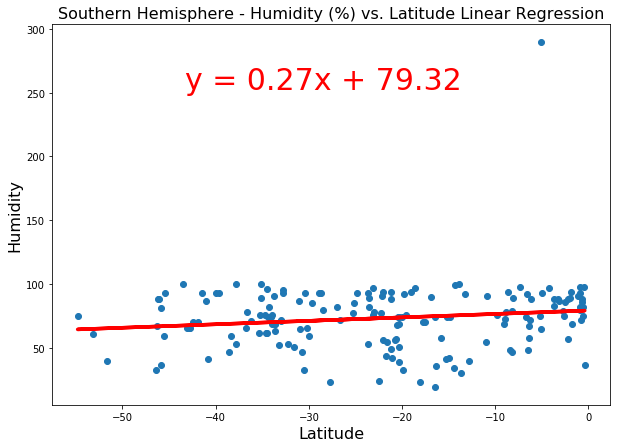

In [363]:
LinearRegression(df_southern_country['Lat'],df_southern_country['Humidity'],"Latitude","Humidity","Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression",0.3,0.8)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.08733547918934018


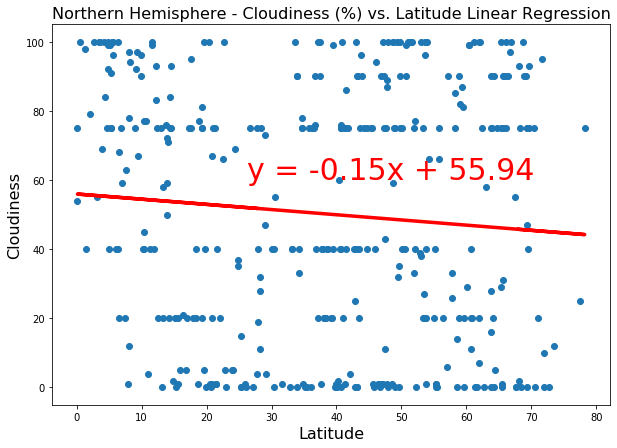

In [359]:
LinearRegression(df_northern_country['Lat'],df_northern_country['Cloudiness'],"Latitude","Cloudiness","Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression",0.4,0.6)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.21881426893991604


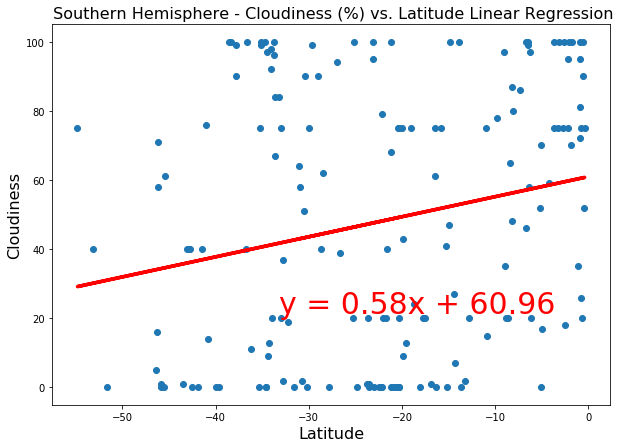

In [362]:
LinearRegression(df_southern_country['Lat'],df_southern_country['Cloudiness'],"Latitude","Cloudiness"," Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression",0.45,0.3)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.10713827743884798


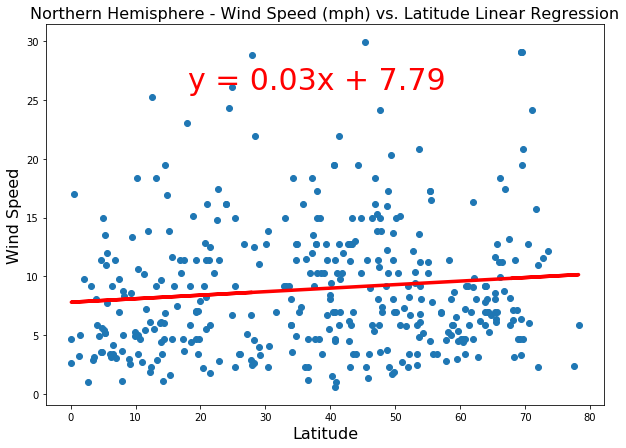

In [368]:
#defining axises for scatter City Latitude vs. Cloudiness and plotting it with labels and title

LinearRegression(df_northern_country['Lat'],df_northern_country['Wind Speed'],"Latitude","Wind Speed","Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression",0.3,0.8)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.3224830771395381


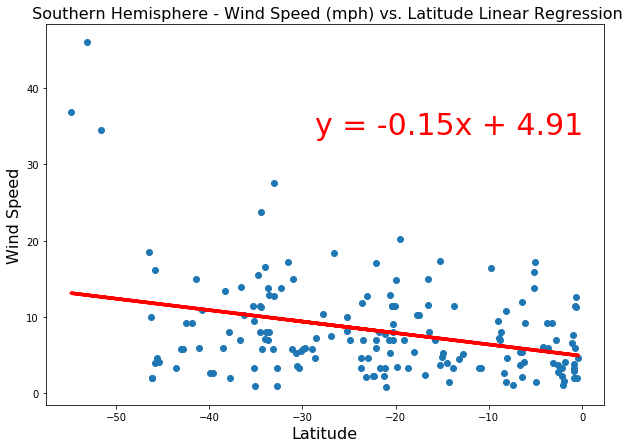

In [370]:
LinearRegression(df_southern_country['Lat'],df_southern_country['Wind Speed'],"Latitude","Wind Speed"," Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression",0.5,0.7)